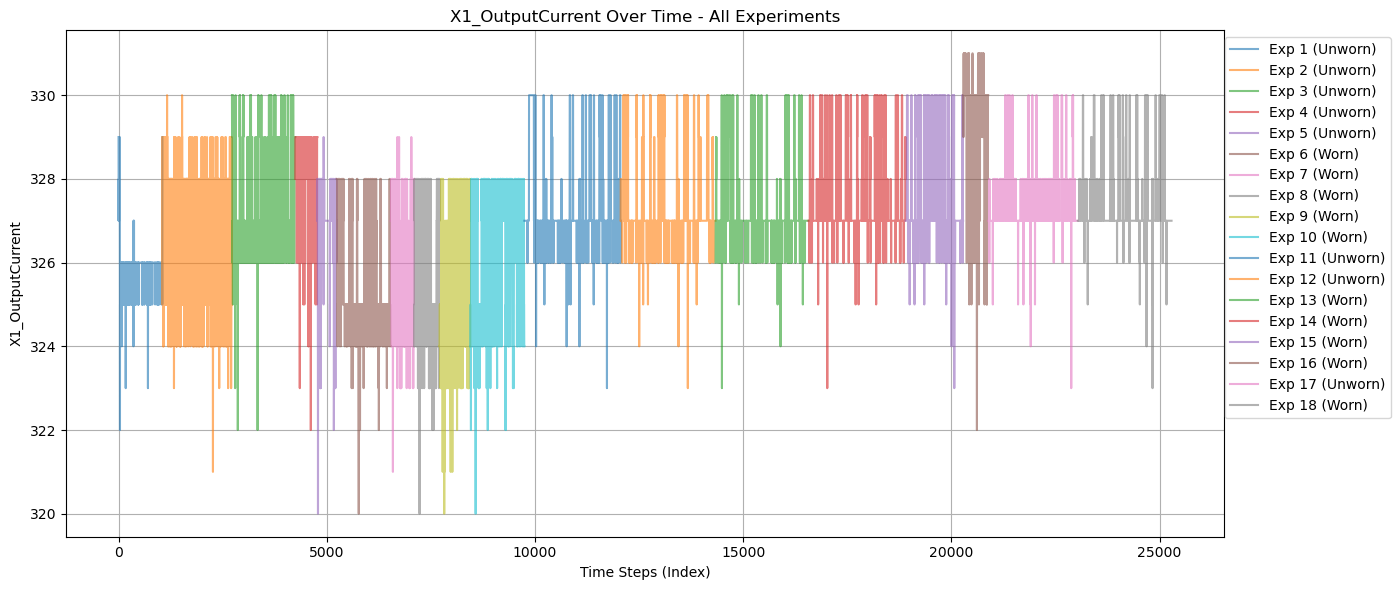

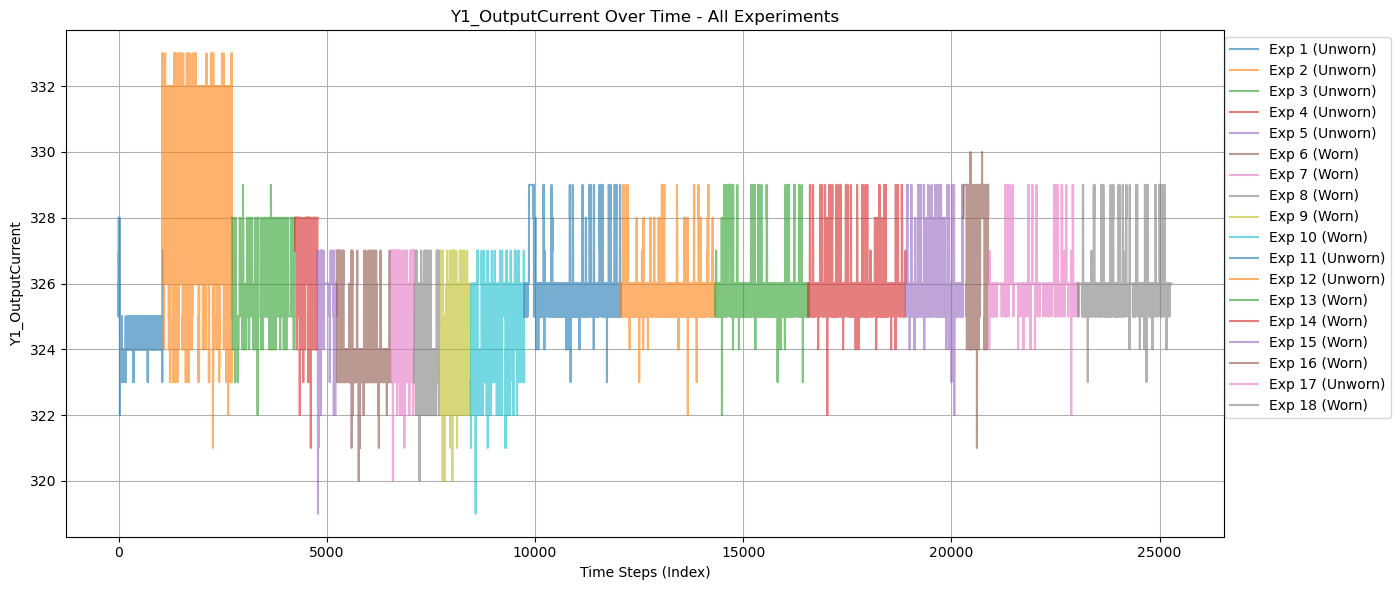

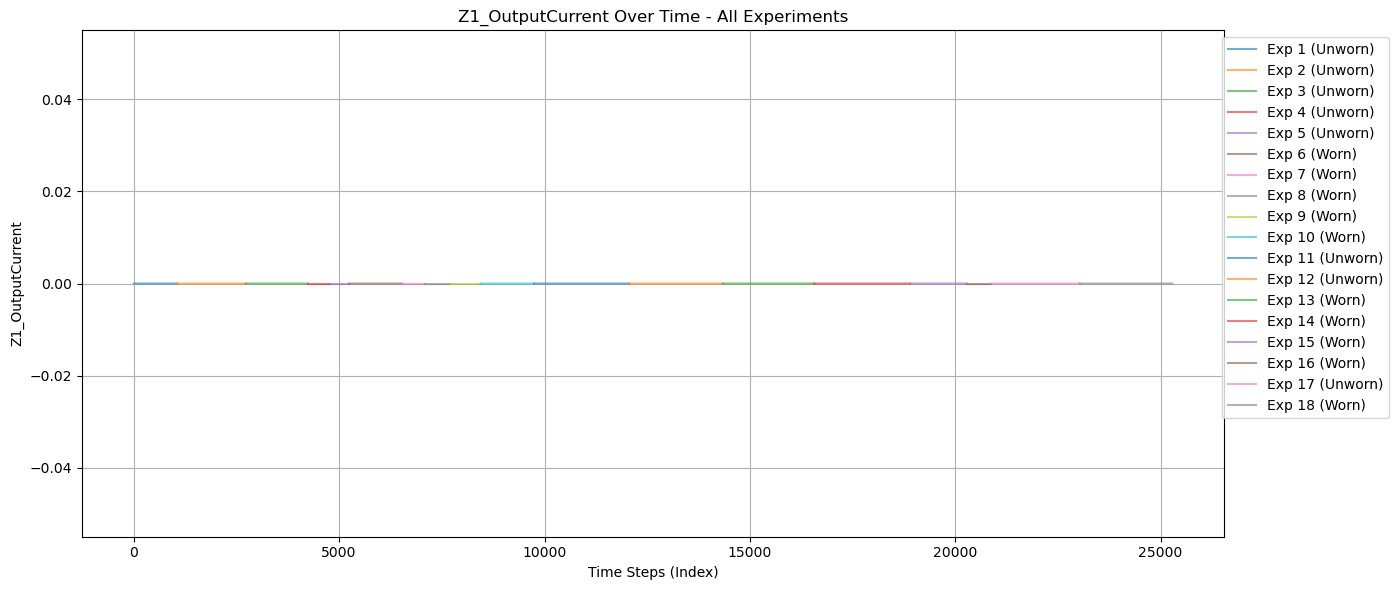

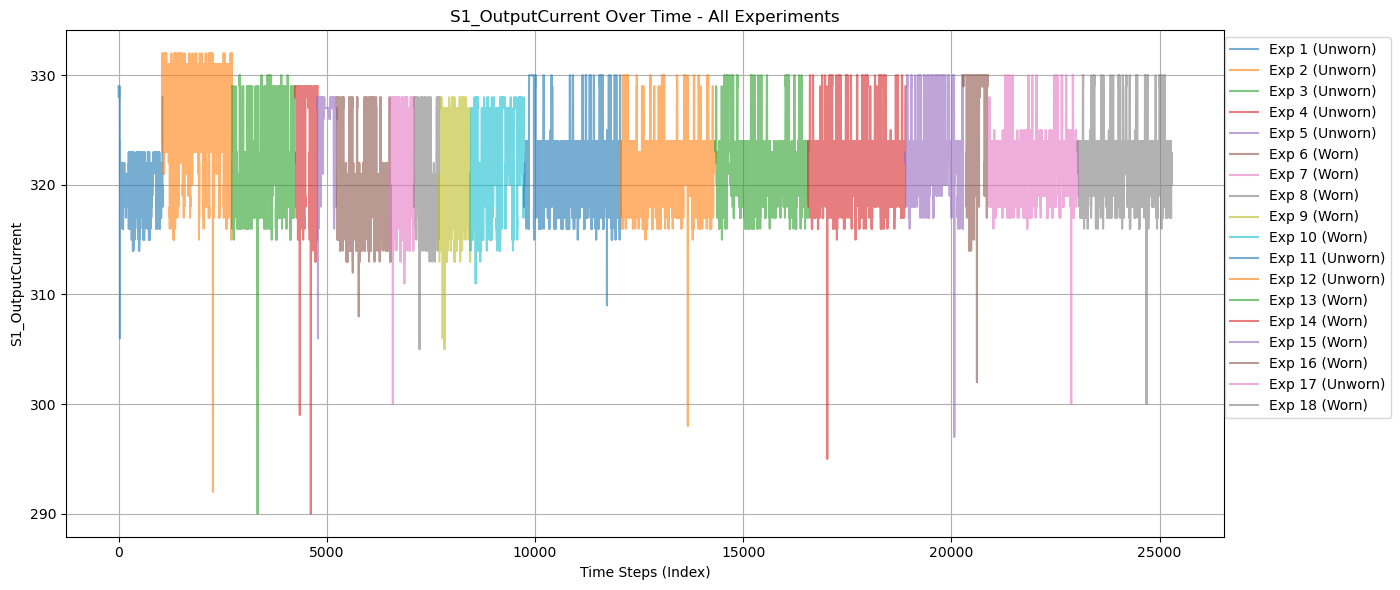

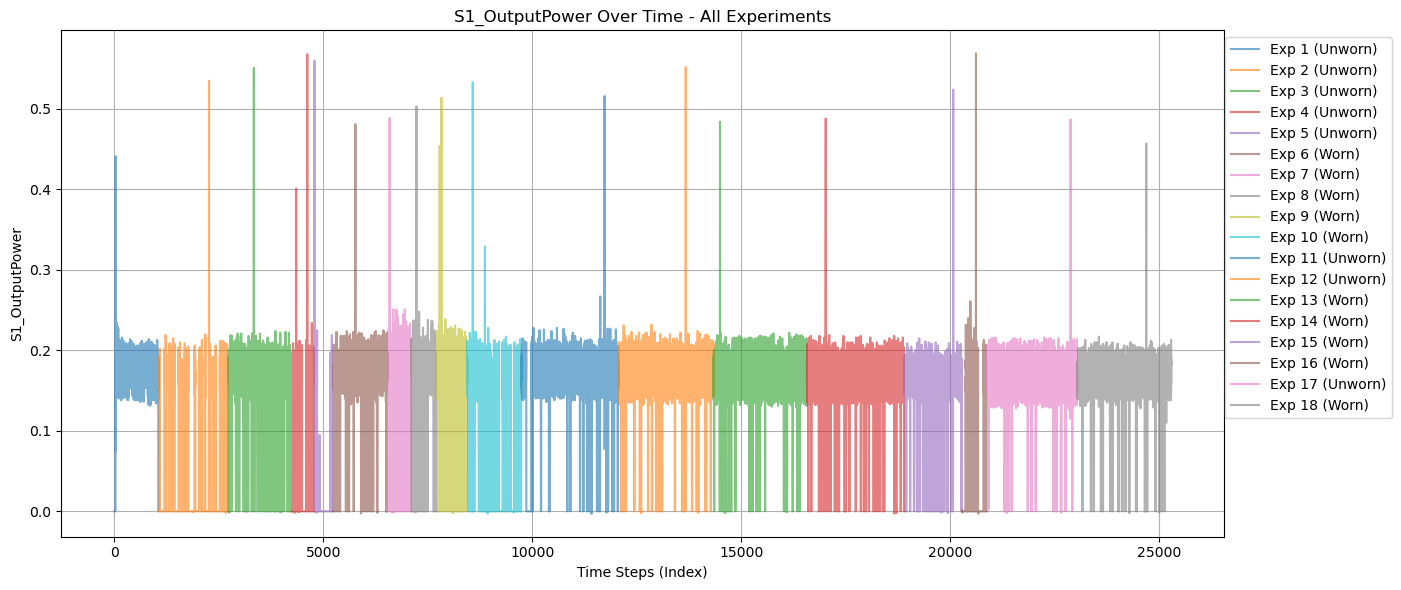

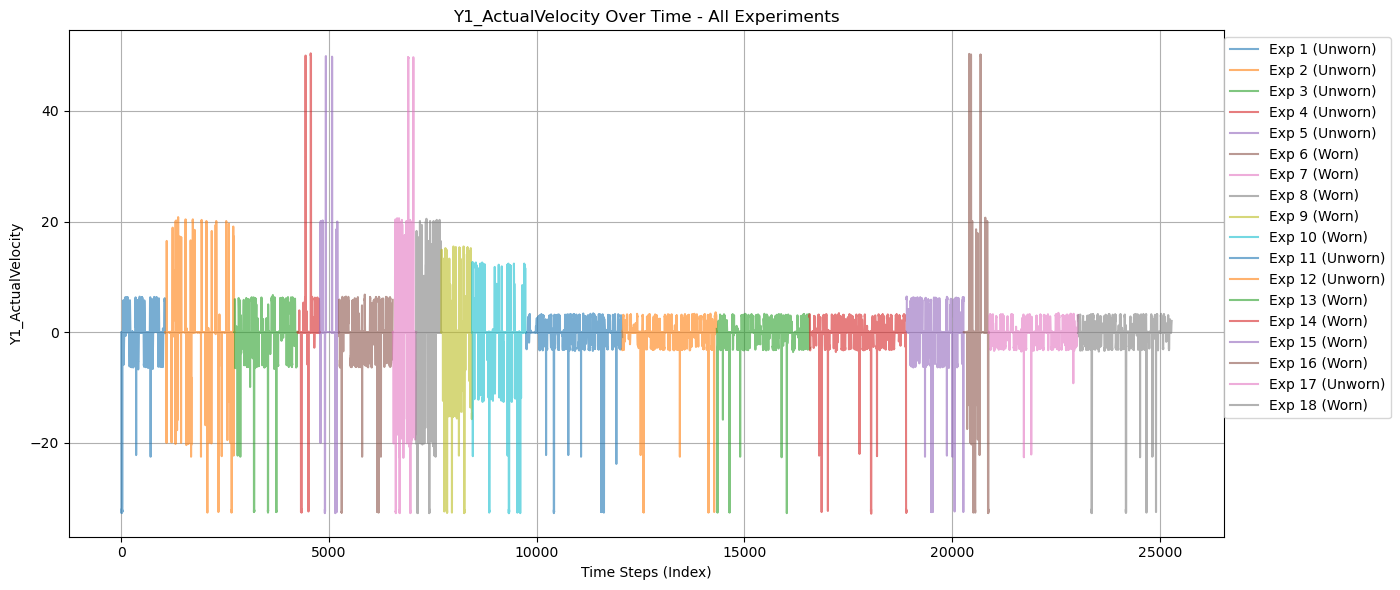

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Load train.csv and clean labels
base_dir = Path("C:/IIT Courses/Fourth Semester/Data Driven Modeling/Final Project/CNC Mill Tool Wear/archive")
train_df = pd.read_csv(base_dir / "train.csv")
train_df['tool_condition'] = train_df['tool_condition'].map({'unworn': 0, 'worn': 1})
train_df['passed_visual_inspection'] = train_df['passed_visual_inspection'].map({'yes': 1, 'no': 0})
train_df['machining_finalized'] = train_df['machining_finalized'].map({'yes': 1, 'no': 0})

# Loading all experiments and combine
experiment_data = []
for i in range(1, 19): 
    file_path = base_dir / f"experiment_{i:02}.xlsx"
    df = pd.read_excel(file_path)
    row = train_df[train_df['No'] == i].iloc[0]
    df['experiment_no'] = i
    df['tool_condition'] = row['tool_condition']
    df['passed_visual_inspection'] = row['passed_visual_inspection']
    df['machining_finalized'] = row['machining_finalized']
    df['feedrate'] = row['feedrate']
    df['clamp_pressure'] = row['clamp_pressure']
    experiment_data.append(df)

full_df = pd.concat(experiment_data, ignore_index=True)

# Plotting sensor trends (one plot per sensor, showing all experiments)
selected_signals = [
    'X1_OutputCurrent', 'Y1_OutputCurrent', 'Z1_OutputCurrent', 'S1_OutputCurrent',
    'S1_OutputPower', 'Y1_ActualVelocity'
]

for signal in selected_signals:
    plt.figure(figsize=(14, 6))
    for exp_no in sorted(full_df['experiment_no'].unique()):
        df_exp = full_df[full_df['experiment_no'] == exp_no]
        worn_label = 'Worn' if df_exp['tool_condition'].iloc[0] == 1 else 'Unworn'
        plt.plot(df_exp.index, df_exp[signal], label=f"Exp {exp_no} ({worn_label})", alpha=0.6)

    plt.title(f"{signal} Over Time - All Experiments")
    plt.xlabel("Time Steps (Index)")
    plt.ylabel(signal)
    plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
    plt.grid(True)
    plt.tight_layout()
    plt.show()
